In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
gis_ec2_df = pd.read_csv("./gis_log_ec2.csv")

# Rename the "elapsed" column to "response_time"
gis_ec2_df = gis_ec2_df.rename(columns={"elapsed": "response_time"})

# Convert the "timeStamp" column to real-time format
# gis_ec2_df["timeStamp"] = pd.to_datetime(gis_ec2_df["timeStamp"], unit='ms')
gis_ec2_df["timeStamp"] = pd.to_datetime(gis_ec2_df["timeStamp"], unit='ms').dt.strftime('%Y-%m-%d-%H-%M')
# gis_ec2_df["hr_min"] = gis_ec2_df["timeStamp"].map(lambda dt: (dt.hour, dt.minute))

# print(gis_ec2_df["hr_min"])


# Calculate the mean and standard deviation of "response_time"
gis_ec2_response_time_mean = gis_ec2_df["response_time"].mean()
gis_ec2_response_time_std = gis_ec2_df["response_time"].std()

# Print the mean and standard deviation
print("Mean response time:", gis_ec2_response_time_mean, "ms")
print("Standard deviation of response time:", gis_ec2_response_time_std, "ms")

# Read the CSV file into a pandas DataFrame
gis_ec2_5_df = pd.read_csv("./gis_log_ec2_5.csv")

# Rename the "elapsed" column to "response_time"
gis_ec2_5_df = gis_ec2_5_df.rename(columns={"elapsed": "response_time"})

# Convert the "timeStamp" column to real-time format
gis_ec2_5_df["timeStamp"] = pd.to_datetime(gis_ec2_5_df["timeStamp"], unit='ms').dt.strftime('%Y-%m-%d-%H-%M')

# Read the CSV file into a pandas DataFrame
gis_fargate_df = pd.read_csv("./gis_log_fargate.csv")

# Rename the "elapsed" column to "response_time"
gis_fargate_df = gis_fargate_df.rename(columns={"elapsed": "response_time"})

# Convert the "timeStamp" column to real-time format
gis_fargate_df["timeStamp"] = pd.to_datetime(gis_fargate_df["timeStamp"], unit='ms').dt.strftime('%Y-%m-%d-%H-%M')

/var/folders/x6/z9351kk561d4v17pxbj3_rph0000gn/T/ipykernel_10292/11165547.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  gis_ec2_df = pd.read_csv("./gis_log_ec2.csv")


Mean response time: 5058.766555 ms
Standard deviation of response time: 7839.938228519495 ms


In [62]:
t_and_resp = gis_ec2_df.groupby("timeStamp")["response_time"].mean().reset_index()
t_and_resp_ec2_5 = gis_ec2_5_df.groupby("timeStamp")["response_time"].mean().reset_index()
t_and_resp_fargate = gis_fargate_df.groupby("timeStamp")["response_time"].mean().reset_index()

In [75]:
everything = t_and_resp.merge(right=t_and_resp_ec2_5, how="outer", left_index=True, right_index=True).reset_index()
everything = everything.merge(right=t_and_resp_fargate, how="outer", left_index=True, right_index=True)

In [77]:
everything

,index,timeStamp_x,response_time_x,timeStamp_y,response_time_y,timeStamp,response_time
0,0.0,2023-04-06-01-51,11834.584556,2023-04-06-02-13,2271.591280,2023-04-06-03-15,12332.252837
1,1.0,2023-04-06-01-52,11834.027188,2023-04-06-02-14,2383.669021,2023-04-06-03-16,13631.028255
2,2.0,2023-04-06-01-53,12083.289384,2023-04-06-02-15,2490.395582,2023-04-06-03-17,13665.101370
3,3.0,2023-04-06-01-54,12012.044413,2023-04-06-02-16,2615.793767,2023-04-06-03-18,13750.118998
4,4.0,2023-04-06-01-55,12317.939481,2023-04-06-02-17,2455.956933,2023-04-06-03-19,13640.348279
5,5.0,2023-04-06-01-56,7986.755401,2023-04-06-02-18,2380.113743,2023-04-06-03-20,10921.019294
6,6.0,2023-04-06-01-57,5980.416201,2023-04-06-02-19,2252.233797,2023-04-06-03-21,6843.761254
7,7.0,2023-04-06-01-58,5984.159014,2023-04-06-02-20,1815.135651,2023-04-06-03-22,6821.846372
8,8.0,2023-04-06-01-59,6162.687872,2023-04-06-02-21,634.164584,2023-04-06-03-23,7056.753981
9,9.0,2023-04-06-02-00,6160.386411,NaN,NaN,2023-04-06-03-24,7026.512483


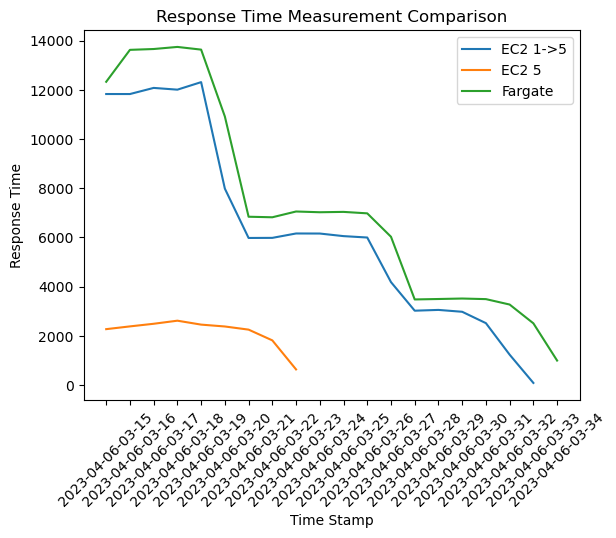

In [81]:
# Plot a line chart for "response_time" vs "timeStamp"
plt.plot(everything["timeStamp"], everything["response_time_x"], label="EC2 1->5")
plt.plot(everything["timeStamp"], everything["response_time_y"], label="EC2 5")
plt.plot(everything["timeStamp"], everything["response_time"], label="Fargate")
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.xlabel("Time Stamp")
plt.ylabel("Response Time")
plt.title("Response Time Measurement Comparison")
plt.show()


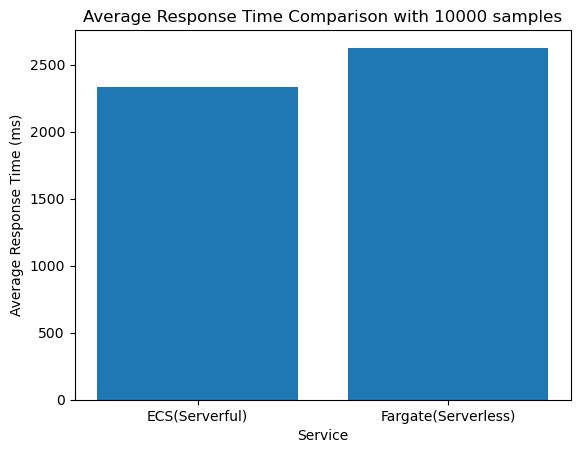

In [84]:
import matplotlib.pyplot as plt

# Define the x-axis labels and the corresponding y-axis values
x_labels = ["ECS(Serverful)", "Fargate(Serverless)"]
y_values = [2332, 2626]

# Plot a bar chart with the x-axis labels and y-axis values
plt.bar(x_labels, y_values)
plt.xlabel("Service")
plt.ylabel("Average Response Time (ms)")
plt.title("Average Response Time Comparison with 10000 test samples")
plt.show()
